In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold #importation de l'outil necessaire pour selectionner nos variance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv('opossum.csv')
print(data.shape)
data.head()

(104, 14)


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
data['age']= data['age'].fillna(data['age'].mean())
data['footlgth']= data['footlgth'].fillna(data['footlgth'].mean())

In [6]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
from sklearn import preprocessing
 
le = preprocessing.LabelEncoder()
data.sex = le.fit_transform(data.sex)
data.Pop = le.fit_transform(data.Pop)
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [8]:
# data.pop('case')
# data.pop('site')
data.pop('Pop')

0      0
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    1
102    1
103    1
Name: Pop, Length: 104, dtype: int64

In [9]:
df_x= data.loc[:,data.columns != "age" ] #toute les colonnes excepté la colonne age 
df_y= data.age
#df_x1= data.loc[:,["Pop","sex"] ] selection par colonnes

In [10]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size= 0.18, random_state= 42) #separation des données test et d'entrainement

print(x_train.shape) #80%
print(x_test.shape)  #20%

(85, 12)
(19, 12)


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print('Train score', model.score(x_train, y_train))
print('Test score', model.score(x_test, y_test))

Train score 0.19649749285924734
Test score 0.06945476332510758


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= scaler.transform(x_test)
x_test= pd.DataFrame(x_test)

<AxesSubplot: ylabel='Density'>

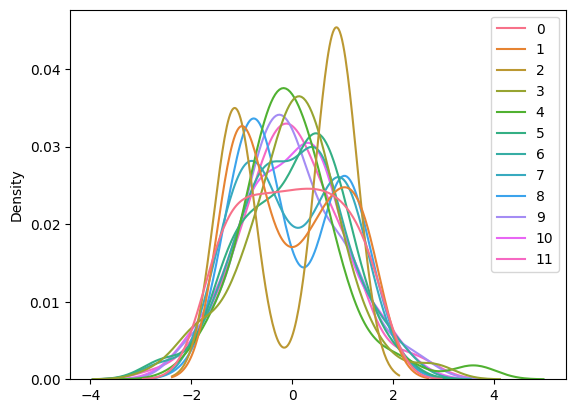

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_scaler = mms.fit_transform(x_train)
x_train_scaler = pd.DataFrame(x_train)

x_test_scaler = mms.fit_transform(x_test)
x_test_scaler = pd.DataFrame(x_test)
sns.kdeplot(x_train_scaler)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaler, y_train)
print('Train score', model.score(x_train_scaler, y_train))
print('Test score', model.score(x_test_scaler, y_test))
0.19649749285924734

Train score 0.19649749285924745
Test score 0.06945476332510758


In [24]:
y_pred = model.predict(x_test_scaler)
print(y_pred)

[3.3599798  4.48492417 4.1284924  4.66850885 2.85238125 3.37297471
 2.60343016 5.11746509 3.65993402 5.11250815 3.74218638 3.13654855
 3.54711905 3.16546048 2.6378865  4.86663537 3.77571982 2.57968554
 4.64529063]


In [25]:
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2.0632622545897834


In [26]:
from sklearn.metrics import r2_score
R= r2_score(y_test, y_pred)
print(R)

0.06945476332510758


Le model de Regresion lineaire et moins bon que celui de KNNregressor.
Le R_2 score et beaucoup plus proche de 0 que celui du model KNNregressor. 
(R_2 de knn = 0.34 conte R_2 de Linear = 0.06)